<a href="https://colab.research.google.com/github/Ayben06/UserClassfication/blob/main/MachineLearningProjectForUserClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the relevant libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import  RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Data Preprocessing

### Importing the Database

In [8]:
row_data=pd.read_csv('/content/ml_datasource.csv')

In [9]:
row_data.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [10]:
data=row_data.copy()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17761 entries, 0 to 17760
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_country         17752 non-null  object 
 1   days_on_platform        17761 non-null  int64  
 2   minutes_watched         17761 non-null  float64
 3   courses_started         17761 non-null  int64  
 4   practice_exams_started  17761 non-null  int64  
 5   practice_exams_passed   17761 non-null  int64  
 6   minutes_spent_on_exams  17761 non-null  float64
 7   purchased               17761 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ MB


### Removing Outliers

In [12]:
sns.set_theme()

<Axes: xlabel='practice_exams_passed', ylabel='Density'>

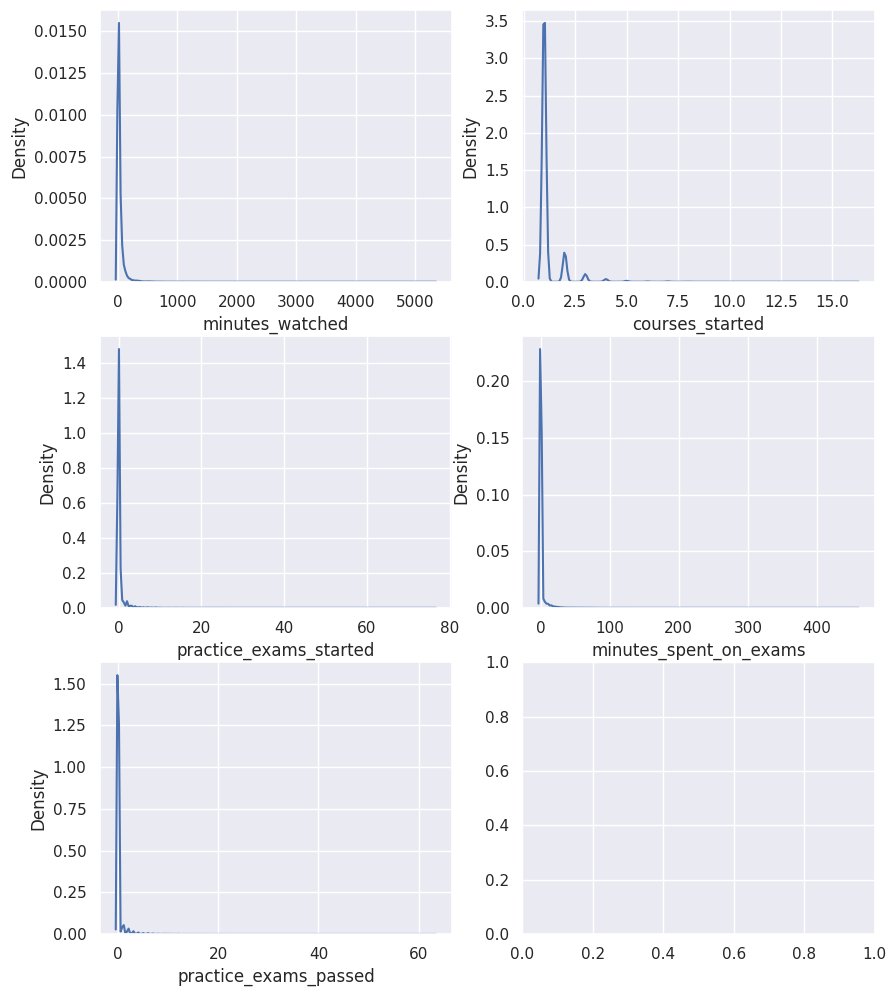

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
sns.kdeplot(data=data['minutes_watched'], ax=axes[0, 0])
sns.kdeplot(data=data['courses_started'], ax=axes[0, 1])
sns.kdeplot(data=data['practice_exams_started'], ax=axes[1, 0])
sns.kdeplot(data=data['minutes_spent_on_exams'], ax=axes[1, 1])
sns.kdeplot(data=data['practice_exams_passed'], ax=axes[2, 0])

In [14]:
data_no_outliers = data[(data['minutes_watched'] <= 1000) & (data['courses_started'] <= 10) &
                        (data['practice_exams_started'] <= 10) &  (data['practice_exams_passed'] <= 10) &(data['minutes_spent_on_exams'] <= 40)]
data_no_outliers.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


<Axes: xlabel='practice_exams_passed', ylabel='Density'>

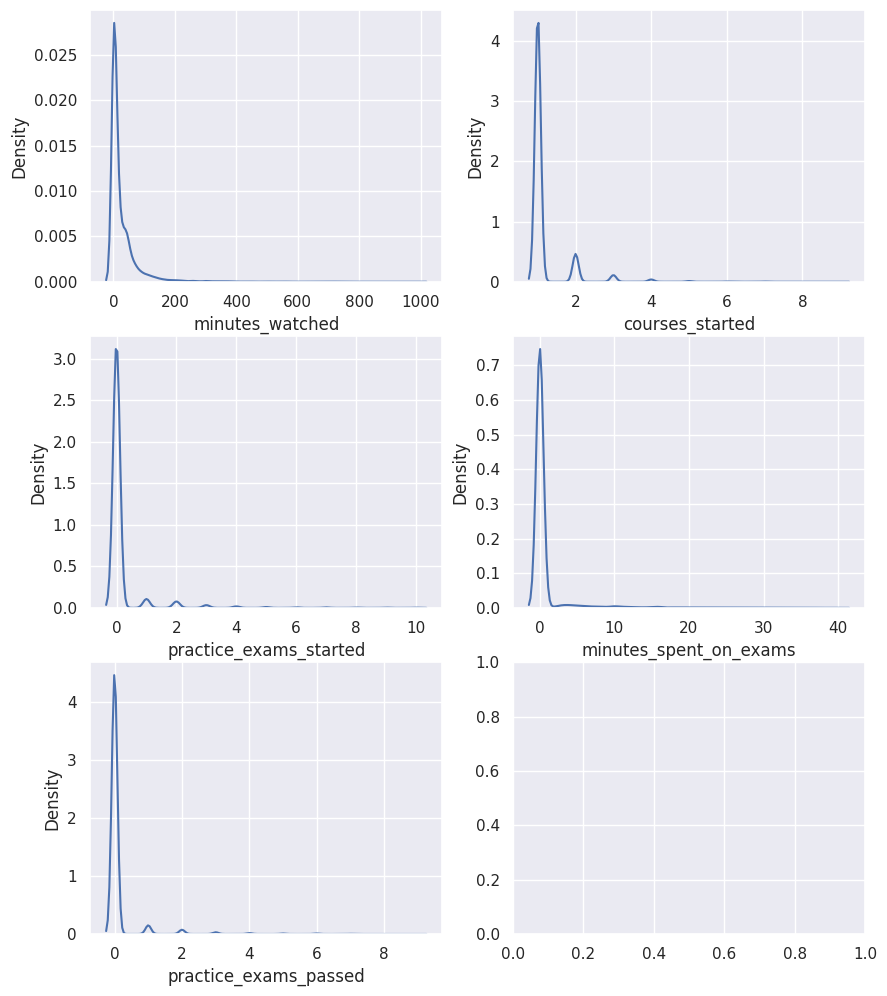

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
sns.kdeplot(data=data_no_outliers['minutes_watched'], ax=axes[0, 0])
sns.kdeplot(data=data_no_outliers['courses_started'], ax=axes[0, 1])
sns.kdeplot(data=data_no_outliers['practice_exams_started'], ax=axes[1, 0])
sns.kdeplot(data=data_no_outliers['minutes_spent_on_exams'], ax=axes[1, 1])
sns.kdeplot(data=data_no_outliers['practice_exams_passed'], ax=axes[2, 0])


### Checking for Multicollinearity

In [16]:
vif_data=data_no_outliers.drop(columns=['purchased','student_country'])
vif_values=pd.DataFrame()
vif_values['Variable']=vif_data.columns
vif_values['VIF']=[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif_data

,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams
0,288,358.1,1,2,2,15.81
1,260,1.7,1,1,0,16.00
2,260,22.4,1,1,0,0.93
3,259,18.8,1,1,1,14.63
4,259,118.0,2,2,1,16.48
...,...,...,...,...,...,...
17756,0,0.8,1,0,0,0.00
17757,0,0.1,1,0,0,0.00
17758,0,7.8,1,0,0,0.00
17759,0,10.4,1,0,0,0.00


In [17]:
vif_values.head()

,Variable,VIF
0,days_on_platform,2.301237
1,minutes_watched,1.788777
2,courses_started,3.178713
3,practice_exams_started,10.201823
4,practice_exams_passed,7.812546


In [18]:
while vif_values['VIF'].max() > 5:
  max_vif_index = vif_values['VIF'].idxmax()
  vif_data = vif_data.drop(columns=[vif_values['Variable'][max_vif_index]])
  vif_values = vif_values.drop(index=max_vif_index)

vif_data.head()

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams
0,288,358.1,1,15.81
1,260,1.7,1,16.00
2,260,22.4,1,0.93
3,259,18.8,1,14.63
4,259,118.0,2,16.48


In [19]:
data_no_mult = pd.concat([vif_data, data_no_outliers['purchased'],data_no_outliers['student_country']], axis=1)

data_no_mult

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased,student_country
0,288,358.1,1,15.81,0,US
1,260,1.7,1,16.00,0,SG
2,260,22.4,1,0.93,0,TR
3,259,18.8,1,14.63,0,KE
4,259,118.0,2,16.48,0,IN
...,...,...,...,...,...,...
17756,0,0.8,1,0.00,0,EG
17757,0,0.1,1,0.00,0,IN
17758,0,7.8,1,0.00,0,CM
17759,0,10.4,1,0.00,0,CA


### Dealing with NaN Values

In [20]:
data_no_nulls=data_no_mult.copy()

In [21]:
data_no_nulls.isnull().sum()

days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
student_country           8
dtype: int64

In [22]:
data_no_nulls.loc[data_no_nulls['student_country'].isna()]

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased,student_country
311,88,58.1,1,11.20,1,NaN
337,86,43.0,1,12.96,0,NaN
556,121,241.9,2,21.29,0,NaN
806,64,86.4,1,4.98,0,NaN
1097,72,67.5,1,6.27,0,NaN
12363,84,6.2,1,0.00,0,NaN
12633,78,3.0,1,0.00,0,NaN
16946,11,8.2,1,0.00,0,NaN


As it turns out, the string NA in database refers to the country code of Namibia. But after importing the CSV file into a `pandas` `DataFrame`, this country code has been translated to `NaN`.
Substitute all `NaN` values in the `student_country` column with the string `'NAM'`.

In [23]:
data_no_nulls['student_country']=data_no_nulls['student_country'].fillna('NAM')

In [24]:
data_no_nulls.isnull().sum()

days_on_platform          0
minutes_watched           0
courses_started           0
minutes_spent_on_exams    0
purchased                 0
student_country           0
dtype: int64

In [25]:
data_no_nulls.head()

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,purchased,student_country
0,288,358.1,1,15.81,0,US
1,260,1.7,1,16.00,0,SG
2,260,22.4,1,0.93,0,TR
3,259,18.8,1,14.63,0,KE
4,259,118.0,2,16.48,0,IN


### Splitting the Data

In [26]:
input=data_no_nulls.drop(columns=['purchased'])
input.head()

,days_on_platform,minutes_watched,courses_started,minutes_spent_on_exams,student_country
0,288,358.1,1,15.81,US
1,260,1.7,1,16.00,SG
2,260,22.4,1,0.93,TR
3,259,18.8,1,14.63,KE
4,259,118.0,2,16.48,IN


In [27]:
target=data_no_nulls['purchased']
target.head()

0    0
1    0
2    0
3    0
4    0
Name: purchased, dtype: int64

In [28]:
x_train,x_test,y_train,y_test= train_test_split(input,target,test_size=0.2,random_state=100,stratify=target)

In [29]:
y_train

9325     0
17059    0
10723    0
7068     0
5841     0
        ..
6518     1
2576     0
10121    0
8424     0
13434    0
Name: purchased, Length: 14100, dtype: int64

### Encoding the Data

In [30]:
enc=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=170)

In [31]:
x_train['student_country_enc']=enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1,1))

In [32]:
x_test['student_country_enc']=enc.fit_transform(x_test['student_country'].to_numpy().reshape(-1,1))

In [33]:
x_train=x_train.drop(columns=['student_country'])
x_test=x_test.drop(columns=['student_country'])

In [34]:
x_train_array=np.asarray(x_train,dtype=float)
x_test_array=np.asarray(x_test,dtype=float)
y_train_array=np.asarray(y_train,dtype=int)
y_test_array=np.asarray(y_test,dtype=int)

In [35]:
y_train_array

array([0, 0, 0, ..., 0, 0, 0])

# Creating a Logistic Regression Model

In [36]:
log_reg=sm.Logit(y_train_array, sm.add_constant(x_train_array))

In [37]:
log_reg_result=log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.149659
         Iterations 10


In [38]:
print(log_reg_result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14094
Method:                           MLE   Df Model:                            5
Date:                Tue, 16 Jan 2024   Pseudo R-squ.:                  0.5132
Time:                        07:10:34   Log-Likelihood:                -2110.2
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0767      0.118     -9.116      0.000      -1.308      -0.845
x1            -0.0677      0.002    -30.342      0.000      -0.072      -0.063
x2             0.0135      0.001     18.019      0.0

In [39]:
y_pred_log_reg=(log_reg_result.predict(sm.add_constant(x_test_array))>0.5).astype(int)

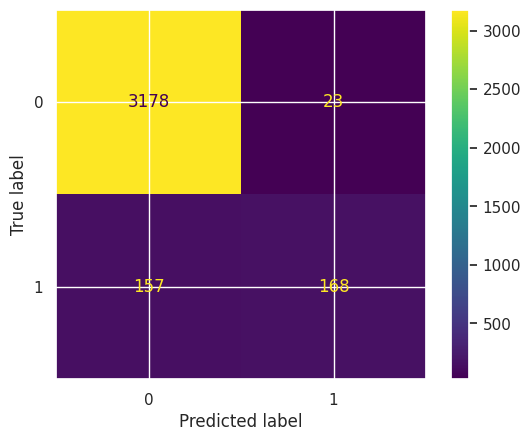

In [40]:
cm_log_reg=confusion_matrix(y_test_array,y_pred_log_reg)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_log_reg,display_labels=[0,1])
disp.plot()

In [41]:
accuracy = accuracy_score(y_test_array, y_pred_log_reg)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_array, y_pred_log_reg)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test_array, y_pred_log_reg)
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test_array, y_pred_log_reg)
print(f'F1-score: {f1:.4f}')


Accuracy: 0.9490
Precision: 0.8796
Recall: 0.5169
F1-score: 0.6512


# Creating a K-Nearest Neighbors Model

In [42]:
parameters_knn={'n_neighbors': range (1,51),'weights': ('uniform','distance')}

In [43]:
knn_clf=KNeighborsClassifier()

In [44]:
grid_search_knn=GridSearchCV(knn_clf,parameters_knn,scoring='accuracy',cv=5)

In [45]:
grid_search_knn.fit(x_train_array,y_train_array)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [46]:
knn_clf=grid_search_knn.best_estimator_

In [47]:
y_pred_knn=knn_clf.predict(x_test_array)

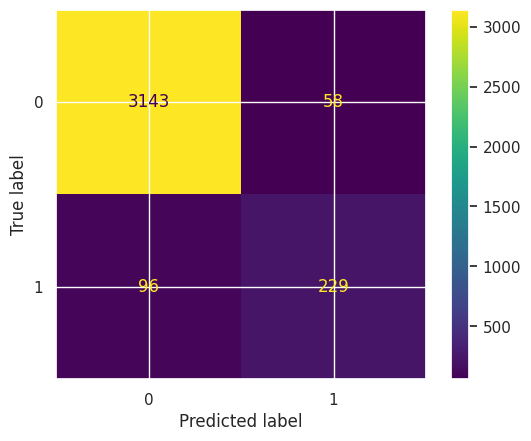

In [48]:
cm_knn=confusion_matrix(y_test_array,y_pred_knn)
disp_knn=ConfusionMatrixDisplay(confusion_matrix=cm_knn,display_labels=[0,1])
disp_knn.plot()

In [49]:
accuracy = accuracy_score(y_test_array, y_pred_knn)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_array, y_pred_knn)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test_array, y_pred_knn)
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test_array, y_pred_knn)
print(f'F1-score: {f1:.4f}')


Accuracy: 0.9563
Precision: 0.7979
Recall: 0.7046
F1-score: 0.7484


# Creating a Support Vector Machines Model

In [50]:
parametr_svm={'C': list(range(1, 11)),'kernel':['linear','rbf','poly'],'gamma':['scale','auto']}

In [51]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [52]:
x_train_scaled = scaler.fit_transform(x_train_array)

x_test_scaled = scaler.transform(x_test_array)

In [53]:
svm_clf=SVC()

In [54]:
grid_search_svm=GridSearchCV(svm_clf,parametr_svm,scoring='accuracy',cv=5)

In [55]:
grid_search_svm.fit(x_train_scaled,y_train_array)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [56]:
svm_clf=grid_search_svm.best_estimator_

In [57]:
y_pred_svm=svm_clf.predict(x_test_scaled)

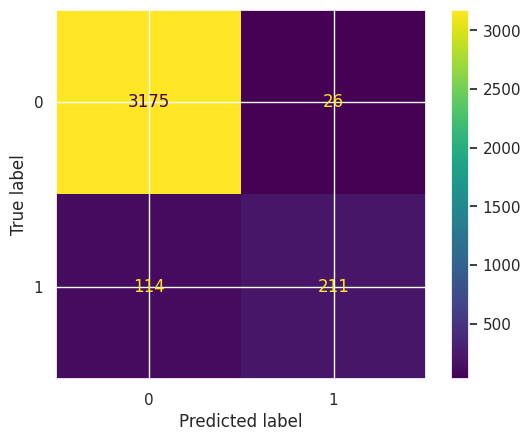

In [58]:
cm_svm=confusion_matrix(y_test_array,y_pred_svm)
disp_svm=ConfusionMatrixDisplay(cm_svm,display_labels=[0,1])
disp_svm.plot()

In [59]:
accuracy = accuracy_score(y_test_array, y_pred_svm)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_array, y_pred_svm)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test_array, y_pred_svm)
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test_array, y_pred_svm)
print(f'F1-score: {f1:.4f}')


Accuracy: 0.9603
Precision: 0.8903
Recall: 0.6492
F1-score: 0.7509


# Creating a Decision Trees Model

In [84]:
parameters_dt={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}

In [85]:
dt_clf=DecisionTreeClassifier(random_state=365)

In [86]:
grid_search_dt=GridSearchCV(dt_clf,parameters_dt,scoring='accuracy',cv=5)

In [87]:
grid_search_dt.fit(x_train_array,y_train_array)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=365),
             param_grid={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring='accuracy')

In [88]:
dt_clf=grid_search_dt.best_estimator_

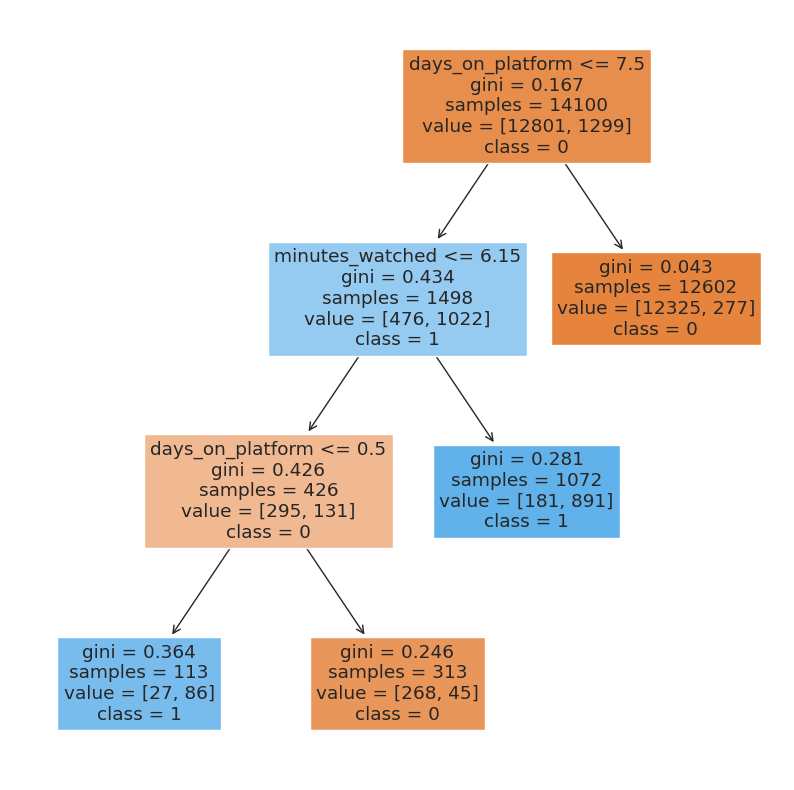

In [94]:
plt.figure(figsize=(10, 10))
plot_tree(dt_clf, filled=True, feature_names=x_train.columns, class_names=['0', '1'])
plt.show()

In [91]:
y_pred_dt=dt_clf.predict(x_test_array)

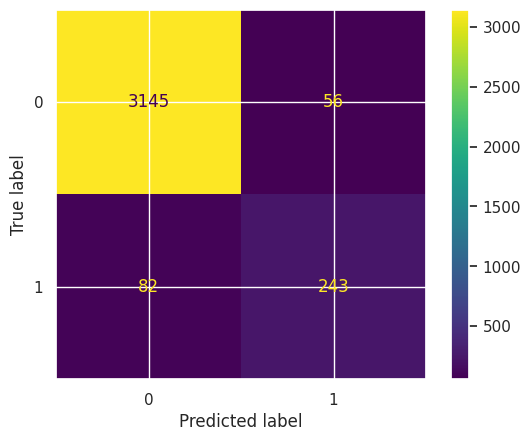

In [92]:
cm_dt=confusion_matrix(y_test_array,y_pred_dt)
disp_dt=ConfusionMatrixDisplay(cm_dt,display_labels=[0,1])
disp_dt.plot()

In [93]:
accuracy = accuracy_score(y_test_array, y_pred_dt)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_array, y_pred_dt)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test_array, y_pred_dt)
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test_array, y_pred_dt)
print(f'F1-score: {f1:.4f}')


Accuracy: 0.9609
Precision: 0.8127
Recall: 0.7477
F1-score: 0.7788


# Creating a Random Forests Model

In [105]:
parametrs_rf={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]}

In [106]:
rf_clf=RandomForestClassifier(random_state=365)

In [107]:
grid_search_rf=GridSearchCV(rf_clf,parametrs_rf,scoring='accuracy',cv=5)

In [108]:
grid_search_rf.fit(x_train_array,y_train_array)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=365),
             param_grid={'ccp_alpha': [0, 0.001, 0.002, 0.003, 0.004, 0.005]},
             scoring='accuracy')

In [109]:
rf_clf=grid_search_rf.best_estimator_

In [134]:
y_pred_rf=rf_clf.predict(x_test_array)

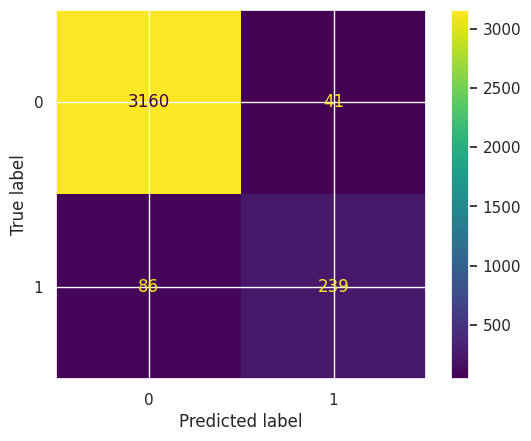

In [136]:
cm_rf=confusion_matrix(y_test_array,y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot()


In [137]:
accuracy = accuracy_score(y_test_array, y_pred_rf)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_array, y_pred_rf)
print(f'Precision: {precision:.4f}')

recall = recall_score(y_test_array, y_pred_rf)
print(f'Recall: {recall:.4f}')

f1 = f1_score(y_test_array, y_pred_rf)
print(f'F1-score: {f1:.4f}')


Accuracy: 0.9640
Precision: 0.8536
Recall: 0.7354
F1-score: 0.7901


# Model Evaluation

In [139]:

print("Logistic Regression:")
print(classification_report(y_test_array, y_pred_log_reg))

print("K-Nearest Neighbors:")
print(classification_report(y_test_array, y_pred_knn))

print("Support Vector Machines:")
print(classification_report(y_test_array, y_pred_svm))

print("Decision Tree:")
print(classification_report(y_test_array, y_pred_dt))

print("Random Forest:")
print(classification_report(y_test_array, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3201
           1       0.88      0.52      0.65       325

    accuracy                           0.95      3526
   macro avg       0.92      0.75      0.81      3526
weighted avg       0.95      0.95      0.94      3526

K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.80      0.70      0.75       325

    accuracy                           0.96      3526
   macro avg       0.88      0.84      0.86      3526
weighted avg       0.95      0.96      0.96      3526

Support Vector Machines:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.89      0.65      0.75       325

    accuracy                           0.96      3526
   macro avg       0.93      0.82      0.86      3526
weighte

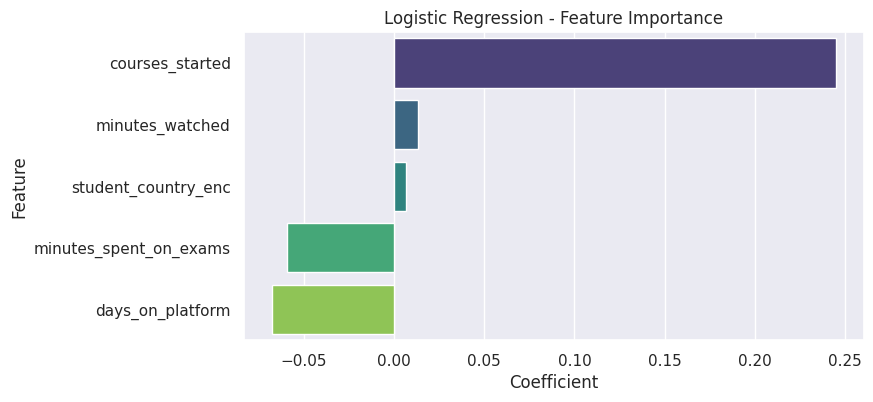

In [151]:
# Step 12: Model Interpretability
# 12.1 Logistic Regression - Feature importance
feature_importance_log_reg = pd.DataFrame({'Feature': x_train.columns, 'Coefficient': log_reg_result.params[1:]})
feature_importance_log_reg = feature_importance_log_reg.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_log_reg, palette='viridis')
plt.title('Logistic Regression - Feature Importance')
plt.show()

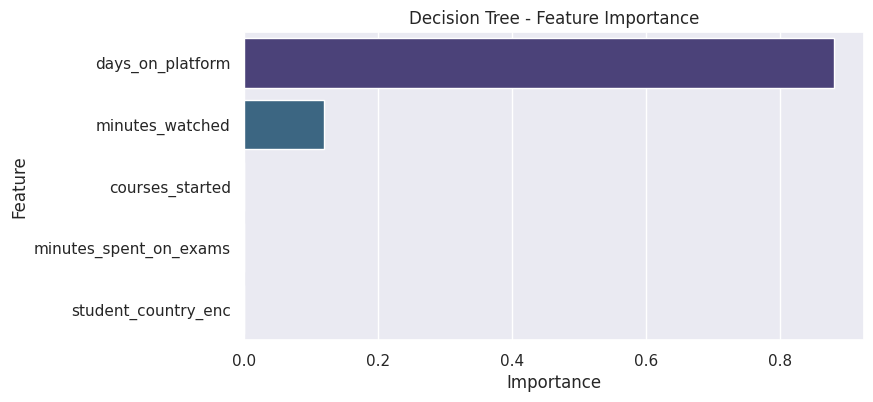

In [152]:

# 12.3 Decision Tree - Feature importance
feature_importance_dt = pd.DataFrame({'Feature': x_train.columns, 'Importance': dt_clf.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

# 12.4 Plot feature importance for decision tree
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt, palette='viridis')
plt.title('Decision Tree - Feature Importance')
plt.show()

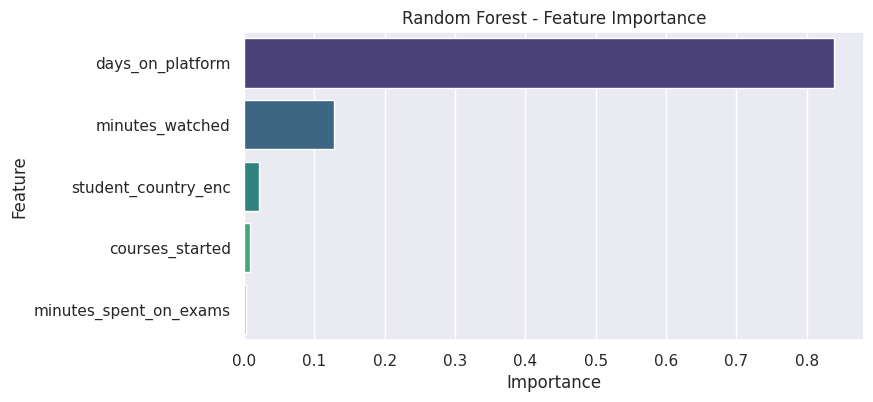

In [153]:
# 12.5 Random Forest - Feature importance
feature_importance_rf = pd.DataFrame({'Feature': x_train.columns, 'Importance': rf_clf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# 12.6 Plot feature importance for random forest
plt.figure(figsize=(8,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.show()

In [148]:
# Step 13: Model Comparison
# 13.1 Create a DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors','Support Vector Machines', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test_array, y_pred_log_reg),
                 accuracy_score(y_test_array, y_pred_knn),
                 accuracy_score(y_test_array, y_pred_svm),
                 accuracy_score(y_test_array, y_pred_dt),
                 accuracy_score(y_test_array, y_pred_rf)],
    'Precision': [precision_score(y_test_array, y_pred_log_reg),
                  precision_score(y_test_array, y_pred_knn),
                  precision_score(y_test_array, y_pred_svm),
                  precision_score(y_test_array, y_pred_dt),
                  precision_score(y_test_array, y_pred_rf)],
    'Recall': [recall_score(y_test_array, y_pred_log_reg),
               recall_score(y_test_array, y_pred_knn),
               recall_score(y_test_array, y_pred_svm),
               recall_score(y_test_array, y_pred_dt),
               recall_score(y_test_array, y_pred_rf)],
    'F1 Score': [f1_score(y_test_array, y_pred_log_reg),
                 f1_score(y_test_array, y_pred_knn),
                 f1_score(y_test_array, y_pred_svm),
                 f1_score(y_test_array, y_pred_dt),
                 f1_score(y_test_array, y_pred_rf)]
})

# 13.2 Display the model comparison
print(model_comparison)

                     Model  Accuracy  Precision    Recall  F1 Score
0      Logistic Regression  0.948951   0.879581  0.516923  0.651163
1      K-Nearest Neighbors  0.956324   0.797909  0.704615  0.748366
2  Support Vector Machines  0.960295   0.890295  0.649231  0.750890
3            Decision Tree  0.960862   0.812709  0.747692  0.778846
4            Random Forest  0.963982   0.853571  0.735385  0.790083


In [161]:
# 14.1 Save the best model (Random Forest) using joblib
import joblib

best_model_filename = 'best_model_random_forest.joblib'
joblib.dump(rf_clf, best_model_filename)

# 14.2 Load the saved model
loaded_model = joblib.load(best_model_filename)
loaded_model

RandomForestClassifier(ccp_alpha=0.001, random_state=365)